<b> Jacob Mannix 
<br>COVID19 Kaggle Challenge
<br>Week 01 Tasks

In [207]:
# Dependencies
import pandas as pd
# import numpy as np

import os
import json

import re
import datetime
from IPython.display import Image

In [145]:
# Directory
%cd /Users/jacobmannix/Box Sync/M.S. Analytics/Analytics Spring/DATA 902/Mittal/Kaggle Covid-19 Challenge/CORD-19-research-challenge 

/Users/jacobmannix/Box Sync/M.S. Analytics/Analytics Spring/DATA 902/Mittal/Kaggle Covid-19 Challenge/CORD-19-research


<b>Q3 - json formats</b>

[json arrays](https://www.w3schools.com/JS/js_json_arrays.asp)
<br> [json objects](https://www.w3schools.com/Js/js_json_objects.asp)
<br> [Working with JSON Data in Python](https://www.geeksforgeeks.org/working-with-json-data-in-python/)

<b>Q4 - Number of Research papers</b>
- Metadata says: 29,500 records
- For loop says: 29,315 records

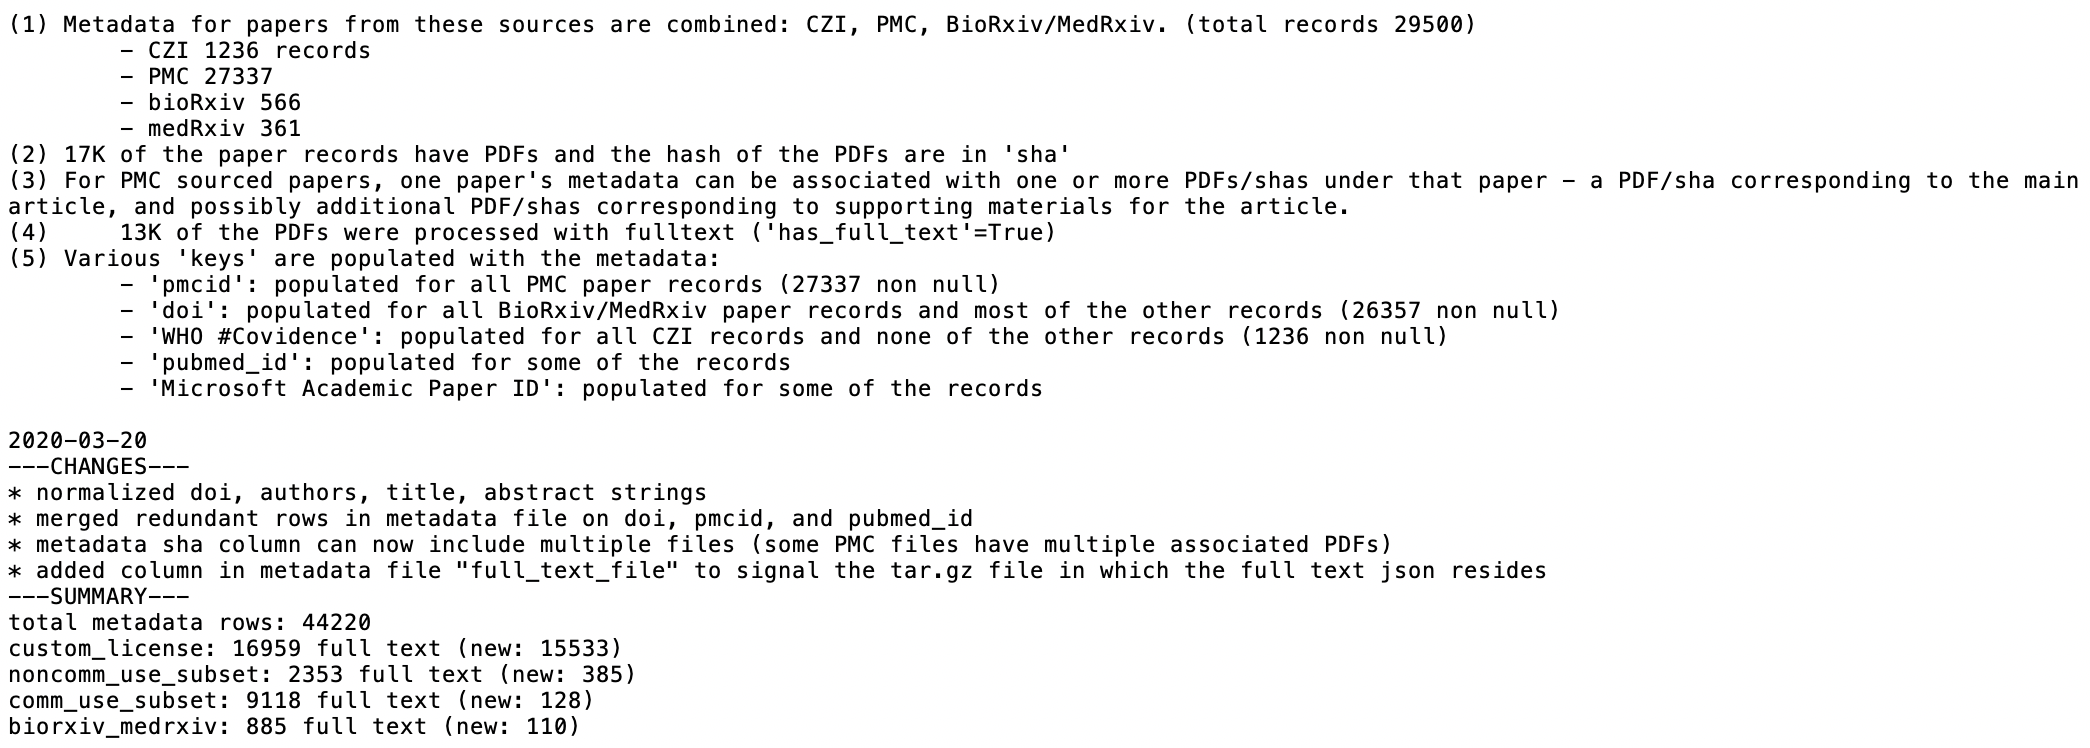

In [55]:
Image(filename='img/metadata.png')

In [146]:
folders = ["biorxiv_medrxiv/biorxiv_medrxiv", "comm_use_subset/comm_use_subset", "custom_license/custom_license", "noncomm_use_subset/noncomm_use_subset"]
i=0
for path in folders:
    print(F"{str(len(os.listdir(path)))} - '{path}'")
    i = i + len(os.listdir(path))
print(F"Total Number of Research Papers: {str(i)}")

885 - 'biorxiv_medrxiv/biorxiv_medrxiv'
9118 - 'comm_use_subset/comm_use_subset'
16959 - 'custom_license/custom_license'
2353 - 'noncomm_use_subset/noncomm_use_subset'
Total Number of Research Papers: 29315


<b>Q5 - Download one json file and extract the main keys(columns) out of it</b>

In [147]:
jsonfile = folders[0]+ '/' + os.listdir("biorxiv_medrxiv/biorxiv_medrxiv")[1]
with open(jsonfile) as f:
    d = json.load(f)
# d

In [186]:
jsonfile_list = []
paper_id = d['paper_id']
title = d['metadata']['title']

# abstract = d['abstract']
for main in d['abstract']:
    abstractT = abstractT + ' ' + main['text']

# body_text = d['body_text']
for main in data['body_text']:
    body_textT = body_textT + ' '+ main['text']

jsonfile_list.append({'paper_id': paper_id,'title': title, 'abstract': abstractT, 'body_text': body_textT})
                     
jsonfile_df = pd.DataFrame(jsonfile_list)

In [187]:
jsonfile_df

,paper_id,title,abstract,body_text
0,9ee72a92dba63a2f7ba385612fa69e180dc8ab09,Ebola Virus Disease Epidemic: What Can the Wor...,"With over 4,500 deaths and counting, and new ...","In September and October, 2014, the United St..."


In [150]:
# d['body_text']

<b>Q6 - Replicate the process using a for-loop and download all the files</b>

In [216]:
# Initiating list/values
jsonfiles_list=[]
i=0
count = 0

# Folders in which research papers are stored 
for p in folders: 
    # Listing all (json) files in these folders
    for f in os.listdir(p):
        with open(p + "/" + f, "r") as files:
            d = json.load(files)
        files.close()
        
        # Main Keys
        paper_id = d['paper_id']
        paper_title = d['metadata']['title']
        
        abs_text = ""
        for main in d['abstract']:
            abs_text = abs_text + ' '+ main['text']
        abs_text

        main_text = ""
        for main in d['body_text']:
            main_text = main_text + ' '+ main['text']
            
        # Appending Main Keys to list
        jsonfiles_list.append({'paper_id': paper_id,'paper_title': paper_title, 'abstract': abs_text, 'main_text': main_text}) #, "file_path": re.findall(r".+\\", path)[0][:-2]})

# List to df
jsonfiles_df = pd.DataFrame(jsonfiles_list)

In [217]:
# View df of all (json) research papers
jsonfiles_df

,paper_id,paper_title,abstract,main_text
0,f905f78b32f63c6d14a79984dfb33f1b358b8ab4,Multimerization of HIV-1 integrase hinges on c...,New anti-AIDS treatments must be continually ...,"In the absence of a curative treatment, the h..."
1,abcfffafab399149d4adadd6bb458c4994e2025d,Time-varying transmission dynamics of Novel Co...,Rationale: Several studies have estimated bas...,"Eighteen years ago, severe acute respiratory ..."
2,0cb9c296684ca5e71462d825cab2827854a01544,p53 is not necessary for DUX4 pathology,Summary Statement: DUX4 is thought to mediate...,Facioscapulohumeral muscular dystrophy (FSHD)...
3,9bbfd3d34ee18ea1b9f4669331a6cee9c5992893,Virological assessment of hospitalized cases o...,"emerged in late 2019 1,2 . Initial outbreaks ...",Pharyngeal virus shedding was very high durin...
4,1218f278a4f8d83dac14b23c8f698062812ef9d5,Potential impact of seasonal forcing on a SARS...,A novel coronavirus (SARS-CoV-2) first detect...,(2.2 with 90% high density interval 1.4-3.8 (...
...,...,...,...,...
29310,ea5d20e07d05c8b241f90e6429f3daaacc844ecd,The Transformation of Enterovirus Replication ...,All positive-strand RNA viruses induce membra...,Enteroviruses (family Picornaviridae) represe...
29311,3b5c43f1068e79db27adaca5df0bd717851c37cc,Pathway and Network Approaches for Identificat...,J Jo ou ur rn na al l o of f C Ca an nc ce er...,A better understanding of disease associated ...
29312,d1b24d21f2004ee1ed983d5fd7526ff2809443e6,Plant-made vaccines and reagents for the One H...,The One Health initiative is increasingly bec...,"The One Health initiative, formerly known as ..."
29313,b66f94ce35f66aa3ce423a16a7e6c814966786d2,NOTE Feline coronavirus isolates from a part o...,The Feline coronavirus (FCoV) can lead to Fel...,"doi: 10 .1292/jvms. jaundice, recurrent fever..."


In [218]:
# Save master df to csv
jsonfiles_df.to_csv("master_text.csv")

<b>Q7 - Make a list of Research Paper IDs and compare the list with the metadata file to find out the IDs that are not available in json format

What I found:
- 29,315 files in json format
- 44,220 from metadata csv
    - 28,462 from metadata csv with (no na's for id's) - (somehow less than json list???, whats wrong here?)
    
Comparing the 2 lists:
- 27,678 - common id's between the two lists
- 1,637 - number of id's that are only present in json list
- 772 - number of id's that are only present in metadata csv (this might be what Prashant is looking for?)

In [255]:
# List of paper id's from json files
paper_id_df = jsonfiles_df['paper_id']
paper_id_df

0        f905f78b32f63c6d14a79984dfb33f1b358b8ab4
1        abcfffafab399149d4adadd6bb458c4994e2025d
2        0cb9c296684ca5e71462d825cab2827854a01544
3        9bbfd3d34ee18ea1b9f4669331a6cee9c5992893
4        1218f278a4f8d83dac14b23c8f698062812ef9d5
                           ...                   
29310    ea5d20e07d05c8b241f90e6429f3daaacc844ecd
29311    3b5c43f1068e79db27adaca5df0bd717851c37cc
29312    d1b24d21f2004ee1ed983d5fd7526ff2809443e6
29313    b66f94ce35f66aa3ce423a16a7e6c814966786d2
29314    9ee72a92dba63a2f7ba385612fa69e180dc8ab09
Name: paper_id, Length: 29315, dtype: object

In [256]:
# Reading in Metadata csv
metadata_csv = pd.read_csv('metadata.csv')
metadata_csv

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44215,d4f00f66c732c292fcfc28b19f44daa2fa620901,PMC,Epidemiology and clinical profile of pathogens...,10.1371/journal.pone.0188325,PMC5693464,29149199.0,cc-by,This study aimed to identify a broad spectrum ...,2017 Nov 17,"Brini, Ines; Guerrero, Aida; Hannachi, Naila; ...",PLoS One,NaN,NaN,True,comm_use_subset
44216,ec575d33c0d3b34af7644fcfed64af045a75ab63,Elsevier,Functional Analysis of the Transmembrane Domai...,10.1016/j.jmb.2008.12.029,PMC2750892,19121325.0,els-covid,"Abstract To enter cells, enveloped viruses use...",2009-02-13,"Bissonnette, Mei Lin Z.; Donald, Jason E.; DeG...",Journal of Molecular Biology,NaN,NaN,True,custom_license
44217,7f8715a818bfd325bf4413d3c07003d7ce7b6f7e,PMC,Viral Entry Properties Required for Fitness in...,10.1128/mBio.00898-18,PMC6030562,29970463.0,cc-by,Human parainfluenza viruses cause a large burd...,2018 Jul 3,"Iketani, Sho; Shean, Ryan C.; Ferren, Marion; ...",mBio,NaN,NaN,True,comm_use_subset
44218,07e78e218a159c35e9599e3751a99551a271597b,Elsevier,Arenavirus reverse genetics: New approaches fo...,10.1016/j.virol.2011.01.013,PMC3057228,21324503.0,els-covid,"Abstract Several arenaviruses, chiefly Lassa v...",2011-03-15,"Emonet, Sebastien E.; Urata, Shuzo; de la Torr...",Virology,NaN,NaN,True,custom_license


In [252]:
# Metadata csv file, list of paper id's
meta_df = metadata_csv['sha'].dropna()
# metadata_csv.loc[metadata_csv['has_full_text'] == True]
meta_df

3        aecbc613ebdab36753235197ffb4f35734b5ca63
5        212e990b378e8d267042753d5f9d4a64ea5e9869
6        bf5d344243153d58be692ceb26f52c08e2bd2d2f
7        ddd2ecf42ec86ad66072962081e1ce4594431f9c
8        a55cb4e724091ced46b5e55b982a14525eea1c7e
                           ...                   
44215    d4f00f66c732c292fcfc28b19f44daa2fa620901
44216    ec575d33c0d3b34af7644fcfed64af045a75ab63
44217    7f8715a818bfd325bf4413d3c07003d7ce7b6f7e
44218    07e78e218a159c35e9599e3751a99551a271597b
44219    04bc03c90437934a75fc6fdc228817234ef84c3a
Name: sha, Length: 28462, dtype: object

In [262]:
# Finding the amount common between the two lists
print("The number of common id's between the two lists:", len(set(paper_id_df) & set(meta_df)))

# Counting the number of file names that are not present in the paper_id_df
print("Number of files only present in paper_id_df (json list):", len(set(paper_id_df).difference(meta_df)))

# Counting the number of file names that are not present in the metadata
print("Number of files only present in Metadata csv:", len(set(meta_df).difference(paper_id_df)))

The number of common id's between the two lists: 27678
Number of files only present in paper_id_df (json list): 1637
Number of files only present in Metadata csv: 772


In [264]:
# Saving a list of the id's that are only present in the metadata list
metadata_difference = set(meta_df).difference(paper_id_df)
# metadata_difference